In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Load dataset
df = pd.read_csv('output.csv')  # Load your actual dataset

# Preprocessing
numerical_features = ['Latitude', 'Longitude', 'Population', 'Row', 'Column', 'NumberofReviews']
categorical_features = ['Category', 'Sub-Category']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Define the model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Create a pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', model)])

# Split data
X = df[numerical_features + categorical_features]
y = df['Rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
pipeline.fit(X_train, y_train)

# Function to predict the best location for a given category and subcategory
def predict_best_location(category, subcategory, grid_size=(20, 20)):
    rows, cols = grid_size
    best_location = None
    best_score = -np.inf

    for row in range(rows):
        for col in range(cols):
            input_data = pd.DataFrame({
                'Latitude': [0],  # Placeholder, update with actual latitude if available
                'Longitude': [0],  # Placeholder, update with actual longitude if available
                'Population': [0],  # Placeholder, update with actual population if available
                'Row': [row],
                'Column': [col],
                'NumberofReviews': [0],  # Placeholder, adjust based on expected number of reviews
                'Category': [category],
                'Sub-Category': [subcategory]
            })
            score = pipeline.predict(input_data)[0]
            if score > best_score:
                best_score = score
                best_location = (row, col)
    
    return best_location, best_score

# Example usage
category = 'Shop'
subcategory = 'Stationery'
best_location, best_score = predict_best_location(category, subcategory, grid_size=(20, 20))
print(f'Best location for {category}-{subcategory} is at row {best_location[0]}, column {best_location[1]} with predicted score {best_score}')


Best location for Shop-Stationery is at row 0, column 0 with predicted score 4.88


In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Example dataset (ensure it includes the correct columns)
data = {
    'Name': ['IndianOil', 'StationeryShop', 'ElectronicsStore'],
    'Rating': [4.1, 3.5, 4.7],
    'NumberofReviews': [2027, 150, 500],
    'Latitude': [30.696984, 30.7000, 30.7010],
    'Longitude': [76.758506, 76.7600, 76.7610],
    'Category': ['FuelStation', 'Shop', 'Shop'],
    'Sub-Category': ['PetrolPump', 'Stationery', 'Electronics'],
    'Row': [3, 5, 5],
    'Column': [19, 20, 21],
    'Population': [13801.8, 14000.5, 14200.3],
    'Rating by Audience': [4.09689655172429, 3.45, 4.65]
}

df = pd.DataFrame(data)

# Preprocessing
numerical_features = ['Latitude', 'Longitude', 'Population', 'Row', 'Column', 'NumberofReviews']
categorical_features = ['Category', 'Sub-Category']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Define the model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Create a pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', model)])

# Split data
X = df[numerical_features + categorical_features]
y = df['Rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
pipeline.fit(X_train, y_train)

# Function to predict the best location for a given category and subcategory
def predict_best_location(category, subcategory, grid_size=(20, 20)):
    rows, cols = grid_size
    best_location = None
    best_score = -np.inf

    # Use realistic placeholders based on mean values from the dataset
    mean_latitude = df['Latitude'].mean()
    mean_longitude = df['Longitude'].mean()
    mean_population = df['Population'].mean()
    mean_numberofreviews = df['NumberofReviews'].mean()

    for row in range(rows):
        for col in range(cols):
            input_data = pd.DataFrame({
                'Latitude': [mean_latitude],  # Use mean latitude
                'Longitude': [mean_longitude],  # Use mean longitude
                'Population': [mean_population],  # Use mean population
                'Row': [row],
                'Column': [col],
                'NumberofReviews': [mean_numberofreviews],  # Use mean number of reviews
                'Category': [category],
                'Sub-Category': [subcategory]
            })
            score = pipeline.predict(input_data)[0]
            if score > best_score:
                best_score = score
                best_location = (row, col)
    
    return best_location, best_score

# Example usage
category = 'Shop'
subcategory = 'Stationery'
best_location, best_score = predict_best_location(category, subcategory, grid_size=(20, 20))
print(f'Best location for {category}-{subcategory} is at row {best_location[0]}, column {best_location[1]} with predicted score {best_score}')


Best location for Shop-Stationery is at row 0, column 0 with predicted score 3.7639999999999985


In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Example dataset (ensure it includes the correct columns)
data = {
    'Name': ['IndianOil', 'StationeryShop', 'ElectronicsStore'],
    'Rating': [4.1, 3.5, 4.7],
    'NumberofReviews': [2027, 150, 500],
    'Latitude': [30.696984, 30.7000, 30.7010],
    'Longitude': [76.758506, 76.7600, 76.7610],
    'Category': ['FuelStation', 'Shop', 'Shop'],
    'Sub-Category': ['PetrolPump', 'Stationery', 'Electronics'],
    'Row': [3, 5, 5],
    'Column': [19, 20, 21],
    'Population': [13801.8, 14000.5, 14200.3],
    'Rating by Audience': [4.09689655172429, 3.45, 4.65]
}

df = pd.DataFrame(data)

# Preprocessing
numerical_features = ['Latitude', 'Longitude', 'Population', 'Row', 'Column', 'NumberofReviews']
categorical_features = ['Category', 'Sub-Category']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Define the model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Create a pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', model)])

# Split data
X = df[numerical_features + categorical_features]
y = df['Rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
pipeline.fit(X_train, y_train)

# Function to predict the best location for a given category and subcategory based on latitude and longitude grid
def predict_best_location(category, subcategory, lat_range, lon_range, grid_size=0.01):
    lat_min, lat_max = lat_range
    lon_min, lon_max = lon_range
    best_location = None
    best_score = -np.inf

    mean_population = df['Population'].mean()
    mean_numberofreviews = df['NumberofReviews'].mean()

    latitudes = np.arange(lat_min, lat_max, grid_size)
    longitudes = np.arange(lon_min, lon_max, grid_size)

    for lat in latitudes:
        for lon in longitudes:
            input_data = pd.DataFrame({
                'Latitude': [lat],
                'Longitude': [lon],
                'Population': [mean_population],
                'Row': [0],  # Placeholder, not used in prediction
                'Column': [0],  # Placeholder, not used in prediction
                'NumberofReviews': [mean_numberofreviews],
                'Category': [category],
                'Sub-Category': [subcategory]
            })
            score = pipeline.predict(input_data)[0]
            if score > best_score:
                best_score = score
                best_location = (lat, lon)
    
    return best_location, best_score

# Example usage
category = 'Shop'
subcategory = 'Stationery'
lat_range = (30.6900, 30.7100)
lon_range = (76.7500, 76.7700)
best_location, best_score = predict_best_location(category, subcategory, lat_range, lon_range, grid_size=0.001)
print(f'Best location for {category}-{subcategory} is at latitude {best_location[0]}, longitude {best_location[1]} with predicted score {best_score}')


Best location for Shop-Stationery is at latitude 30.69, longitude 76.75 with predicted score 3.7639999999999985


In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import folium

# Example dataset (ensure it includes the correct columns)
data = {
    'Name': ['IndianOil', 'StationeryShop', 'ElectronicsStore'],
    'Rating': [4.1, 3.5, 4.7],
    'NumberofReviews': [2027, 150, 500],
    'Latitude': [30.696984, 30.7000, 30.7010],
    'Longitude': [76.758506, 76.7600, 76.7610],
    'Category': ['FuelStation', 'Shop', 'Shop'],
    'Sub-Category': ['PetrolPump', 'Stationery', 'Electronics'],
    'Row': [3, 5, 5],
    'Column': [19, 20, 21],
    'Population': [13801.8, 14000.5, 14200.3],
    'Rating by Audience': [4.09689655172429, 3.45, 4.65]
}

df = pd.DataFrame(data)

# Preprocessing
numerical_features = ['Latitude', 'Longitude', 'Population', 'Row', 'Column', 'NumberofReviews']
categorical_features = ['Category', 'Sub-Category']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Define the model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Create a pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', model)])

# Split data
X = df[numerical_features + categorical_features]
y = df['Rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
pipeline.fit(X_train, y_train)

# Function to predict the best location for a given category and subcategory based on latitude and longitude grid
def predict_best_location(category, subcategory, lat_range, lon_range, grid_size=0.01):
    lat_min, lat_max = lat_range
    lon_min, lon_max = lon_range
    best_location = None
    best_score = -np.inf

    mean_population = df['Population'].mean()
    mean_numberofreviews = df['NumberofReviews'].mean()

    latitudes = np.arange(lat_min, lat_max, grid_size)
    longitudes = np.arange(lon_min, lon_max, grid_size)
    scores = []

    for lat in latitudes:
        for lon in longitudes:
            input_data = pd.DataFrame({
                'Latitude': [lat],
                'Longitude': [lon],
                'Population': [mean_population],
                'Row': [0],  # Placeholder, not used in prediction
                'Column': [0],  # Placeholder, not used in prediction
                'NumberofReviews': [mean_numberofreviews],
                'Category': [category],
                'Sub-Category': [subcategory]
            })
            score = pipeline.predict(input_data)[0]
            scores.append((lat, lon, score))
            if score > best_score:
                best_score = score
                best_location = (lat, lon)
    
    return best_location, best_score, scores

# Example usage
category = 'Shop'
subcategory = 'Stationery'
lat_range = (30.6900, 30.7100)
lon_range = (76.7500, 76.7700)
best_location, best_score, scores = predict_best_location(category, subcategory, lat_range, lon_range, grid_size=0.001)

# Create a map
m = folium.Map(location=[(lat_range[0] + lat_range[1]) / 2, (lon_range[0] + lon_range[1]) / 2], zoom_start=14)

# Add grid points to the map
for lat, lon, score in scores:
    folium.Circle(
        location=[lat, lon],
        radius=10,
        color='blue',
        fill=True,
        fill_opacity=0.2
    ).add_to(m)

# Add best location marker
folium.Marker(
    location=best_location,
    popup=f"Best Location: {category}-{subcategory}\nScore: {best_score}",
    icon=folium.Icon(color='red')
).add_to(m)

# Save the map to an HTML file
m.save("best_location_map.html")

# To display the map in a Jupyter notebook, you can use
#m


In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import folium

# Load dataset from CSV file
df = pd.read_csv('output.csv')

# Ensure the dataset has the correct columns
expected_columns = ['Name', 'Rating', 'NumberofReviews', 'Latitude', 'Longitude', 'Category', 'Sub-Category', 'Row', 'Column', 'Population', 'Rating_by_Audience']
for col in expected_columns:
    if col not in df.columns:
        raise ValueError(f"Column {col} is missing from the dataset")

# Preprocessing
numerical_features = ['Latitude', 'Longitude', 'Population', 'Row', 'Column', 'NumberofReviews']
categorical_features = ['Category', 'Sub-Category']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Define the model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Create a pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', model)])

# Split data
X = df[numerical_features + categorical_features]
y = df['Rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
pipeline.fit(X_train, y_train)

# Function to predict the best location for a given category and subcategory based on latitude and longitude grid
def predict_best_location(category, subcategory, lat_range, lon_range, grid_size=0.01):
    lat_min, lat_max = lat_range
    lon_min, lon_max = lon_range
    best_location = None
    best_score = -np.inf

    mean_population = df['Population'].mean()
    mean_numberofreviews = df['NumberofReviews'].mean()

    latitudes = np.arange(lat_min, lat_max, grid_size)
    longitudes = np.arange(lon_min, lon_max, grid_size)
    scores = []

    for lat in latitudes:
        for lon in longitudes:
            input_data = pd.DataFrame({
                'Latitude': [lat],
                'Longitude': [lon],
                'Population': [mean_population],
                'Row': [0],  # Placeholder, not used in prediction
                'Column': [0],  # Placeholder, not used in prediction
                'NumberofReviews': [mean_numberofreviews],
                'Category': [category],
                'Sub-Category': [subcategory]
            })
            score = pipeline.predict(input_data)[0]
            scores.append((lat, lon, score))
            if score > best_score:
                best_score = score
                best_location = (lat, lon)
    
    return best_location, best_score, scores

# Example usage
category = 'Shop'
subcategory = 'Stationery'
lat_range = (30.6900, 30.7100)
lon_range = (76.7500, 76.7700)
best_location, best_score, scores = predict_best_location(category, subcategory, lat_range, lon_range, grid_size=0.001)

# Create a map
m = folium.Map(location=[(lat_range[0] + lat_range[1]) / 2, (lon_range[0] + lon_range[1]) / 2], zoom_start=14)

# Add grid points to the map
for lat, lon, score in scores:
    folium.Circle(
        location=[lat, lon],
        radius=10,
        color='blue',
        fill=True,
        fill_opacity=0.2
    ).add_to(m)

# Add best location marker
folium.Marker(
    location=best_location,
    popup=f"Best Location: {category}-{subcategory}\nScore: {best_score}",
    icon=folium.Icon(color='red')
).add_to(m)

# Save the map to an HTML file
m.save("best_location_map.html")

# To display the map in a Jupyter notebook, you can use
#m


Bard

In [19]:
###Trash
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
import folium
from scipy.optimize import minimize

# Load dataset
df = pd.read_csv('output.csv')

# Preprocessing (same as before)
numerical_features = ['Latitude', 'Longitude', 'Population', 'NumberofReviews', 'Rating_by_Audience']
categorical_features = ['Category', 'Sub-Category']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Model (Random Forest Regressor in this example)
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])

# Split data (same as before)
X = df[numerical_features + categorical_features]
y = df['Rating']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model (same as before)
pipeline.fit(X_train, y_train)

# Evaluation (same as before)
y_pred = pipeline.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')

# Optimization function to find the best location
def location_score(params, category, subcategory):
    latitude, longitude = params
    input_data = pd.DataFrame({
        'Latitude': [latitude],
        'Longitude': [longitude],
        'Population': [df['Population'].mean()],  # Using mean for now
        'NumberofReviews': [df['NumberofReviews'].mean()],  # Using mean for now
        'Rating_by_Audience': [df['Rating_by_Audience'].mean()],  # Using mean for now
        'Category': [category],
        'Sub-Category': [subcategory]
    })
    predicted_rating = pipeline.predict(input_data)[0]
    
    # Invert the rating for minimization (we want to maximize)
    score = -predicted_rating
    return score

# Predict best location
def predict_best_location(category, subcategory, initial_guess=(df['Latitude'].mean(), df['Longitude'].mean())):
    result = minimize(
        location_score, 
        initial_guess, 
        args=(category, subcategory),
        method='Nelder-Mead'  # You can try other optimization methods
    )
    best_latitude, best_longitude = result.x
    return best_latitude, best_longitude

# Example usage with multiple categories and subcategories
categories_subcategories = [
    ('FuelStation', 'PetrolPump'),
    ('Shop', 'Stationery'),
    ('Restaurant', 'FastFood')
]

for category, subcategory in categories_subcategories:
    best_latitude, best_longitude = predict_best_location(category, subcategory)
    print(f'Best location for {category}-{subcategory}: ({best_latitude:.4f}, {best_longitude:.4f})')

    # Visualize
    map_center = [df['Latitude'].mean(), df['Longitude'].mean()]
    m = folium.Map(location=map_center, zoom_start=12)
    folium.Marker(
        location=[best_latitude, best_longitude],
        popup=f"Best Location: {category}-{subcategory}",
        icon=folium.Icon(color='green', icon='star')
    ).add_to(m)

    # Display the map
    m



Mean Squared Error: 0.00
R-squared: 1.00
Best location for FuelStation-PetrolPump: (30.6972, 76.7624)
Best location for Shop-Stationery: (30.6972, 76.7624)
Best location for Restaurant-FastFood: (30.6972, 76.7624)


In [22]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
import folium
from scipy.optimize import minimize

# Load dataset
df = pd.read_csv('output.csv')

# Preprocessing
numerical_features = ['Latitude', 'Longitude', 'Population', 'NumberofReviews', 'Rating_by_Audience']
categorical_features = ['Category', 'Sub-Category']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Model (Random Forest Regressor)
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])

# Split data
X = df[numerical_features + categorical_features]
y = df['Rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
pipeline.fit(X_train, y_train)

# Evaluation
y_pred = pipeline.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')

# Optimization function to find the best location
def location_score(params, category, subcategory):
    latitude, longitude = params
    input_data = pd.DataFrame({
        'Latitude': [latitude],
        'Longitude': [longitude],
        'Population': [df['Population'].mean()],
        'NumberofReviews': [df['NumberofReviews'].mean()],
        'Rating_by_Audience': [df['Rating_by_Audience'].mean()],
        'Category': [category],
        'Sub-Category': [subcategory]
    })
    predicted_rating = pipeline.predict(input_data)[0]
    # Invert the rating for minimization (we want to maximize)
    score = -predicted_rating
    return score

# Predict best location
def predict_best_location(category, subcategory, initial_guess=(df['Latitude'].mean(), df['Longitude'].mean())):
    result = minimize(
        location_score,
        initial_guess,
        args=(category, subcategory),
        method='Nelder-Mead',
        options={'maxiter': 500}  # Adjust the number of iterations if needed
    )
    best_latitude, best_longitude = result.x
    return best_latitude, best_longitude

# Example usage with multiple categories and subcategories
categories_subcategories = [
    ('FuelStation', 'PetrolPump'),
    ('Shop', 'Stationery'),
    ('Restaurant', 'FastFood')
]

for category, subcategory in categories_subcategories:
    best_latitude, best_longitude = predict_best_location(category, subcategory)
    print(f'Best location for {category}-{subcategory}: ({best_latitude:.4f}, {best_longitude:.4f})')

    # Visualize
    map_center = [df['Latitude'].mean(), df['Longitude'].mean()]
    m = folium.Map(location=map_center, zoom_start=12)
    folium.Marker(
        location=[best_latitude, best_longitude],
        popup=f"Best Location: {category}-{subcategory}",
        icon=folium.Icon(color='green', icon='star')
    ).add_to(m)

    # Display the map
    m.save(f'map_{category}_{subcategory}.html')
    print(f'Map saved as map_{category}_{subcategory}.html')


Mean Squared Error: 0.00
R-squared: 1.00
Best location for FuelStation-PetrolPump: (30.6972, 76.7624)
Map saved as map_FuelStation_PetrolPump.html
Best location for Shop-Stationery: (30.6972, 76.7624)
Map saved as map_Shop_Stationery.html
Best location for Restaurant-FastFood: (30.6972, 76.7624)
Map saved as map_Restaurant_FastFood.html


Visualize

In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Load the dataset
data = pd.read_csv('output.csv')

# Handle missing values (if any)
data = data.dropna()

# Define feature and target variables
X = data[['Latitude', 'Longitude', 'Category', 'Sub-Category']]
y = data['Rating']

# Encode categorical variables and scale numerical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['Latitude', 'Longitude']),
        ('cat', OneHotEncoder(handle_unknown='ignore'), ['Category', 'Sub-Category'])
    ])

# Define the model
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Function to predict rating for a new shop
def predict_rating(latitude, longitude, category, sub_category):
    new_data = pd.DataFrame({
        'Latitude': [latitude],
        'Longitude': [longitude],
        'Category': [category],
        'Sub-Category': [sub_category]
    })
    return model.predict(new_data)[0]

# Predict rating for a new shop
latitude = 30.682168636298282
longitude = 76.72702286772908
category = 'Restaurants'
sub_category = 'FastFood'
predicted_rating = predict_rating(latitude, longitude, category, sub_category)
print(f'Predicted Rating for new shop: {predicted_rating}')


Mean Squared Error: 0.07895253408736198
Predicted Rating for new shop: 4.566000000000001


In [18]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

# Load the dataset
data = pd.read_csv('output.csv')

# Handle missing values (if any)
data = data.dropna()

# Define feature and target variables
X = data[['Latitude', 'Longitude', 'Category', 'Sub-Category', 'Population', 'Rating_by_Audience']]
y = data['Rating']

# Encode categorical variables and scale numerical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['Latitude', 'Longitude', 'Population', 'Rating_by_Audience']),
        ('cat', OneHotEncoder(), ['Category', 'Sub-Category'])
    ])

# Define the model
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, random_state=42))
])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Function to predict rating for a new shop
def predict_rating(latitude, longitude, category, sub_category, population, rating_by_audience):
    new_data = pd.DataFrame({
        'Latitude': [latitude],
        'Longitude': [longitude],
        'Category': [category],
        'Sub-Category': [sub_category],
        'Population': [population],
        'Rating_by_Audience': [rating_by_audience]
    })
    return model.predict(new_data)[0]

# Predict rating for a new shop
latitude = 35.658820
longitude = 73.554152415
category = 'Restaurant'
sub_category = 'FastFood'
population = 5000
rating_by_audience = 4.0
predicted_rating = predict_rating(latitude, longitude, category, sub_category, population, rating_by_audience)
print(f'Predicted Rating for new shop: {predicted_rating}')


Mean Squared Error: 0.036707644931069455
Predicted Rating for new shop: 4.45579079686786


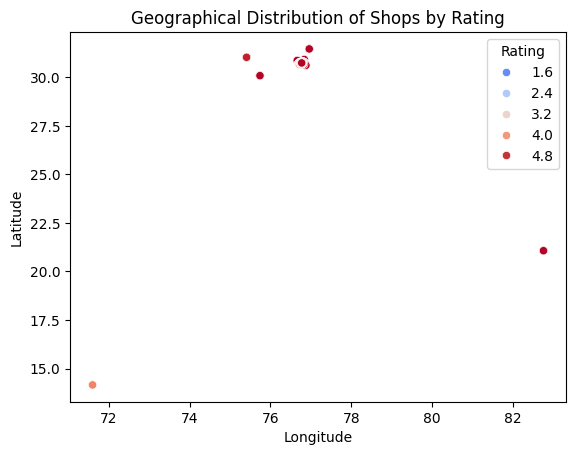

C:\Users\Sarva\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_search.py:1051: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan]
  warnings.warn(


Mean Squared Error: 0.13478183289238074
Best parameters: {'regressor__learning_rate': 0.01, 'regressor__max_depth': 3, 'regressor__n_estimators': 100}
Predicted Rating for new shop: 4.32893833463432


C:\Users\Sarva\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


In [19]:
#input latitude and the longitude predict the rating and represent it in a graphical way
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.cluster import KMeans

# Load the dataset
data = pd.read_csv('output.csv')

# Handle missing values (if any)
data = data.dropna()

# Visualize the data
sns.scatterplot(x=data['Longitude'], y=data['Latitude'], hue=data['Rating'], palette='coolwarm')
plt.title('Geographical Distribution of Shops by Rating')
plt.show()

# Feature engineering: Create interaction features
data['Lat_Long_Interaction'] = data['Latitude'] * data['Longitude']

# Clustering: Create cluster features
kmeans = KMeans(n_clusters=10, random_state=42)
data['Cluster'] = kmeans.fit_predict(data[['Latitude', 'Longitude']])

# Define feature and target variables
X = data[['Latitude', 'Longitude', 'Category', 'Sub-Category', 'Population', 'Rating_by_Audience', 'Lat_Long_Interaction', 'Cluster']]
y = data['Rating']

# Encode categorical variables and scale numerical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['Latitude', 'Longitude', 'Population', 'Rating_by_Audience', 'Lat_Long_Interaction', 'Cluster']),
        ('cat', OneHotEncoder(), ['Category', 'Sub-Category'])
    ])

# Define the model
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', GradientBoostingRegressor(random_state=42))
])

# Hyperparameter tuning
param_grid = {
    'regressor__n_estimators': [100, 200, 300],
    'regressor__learning_rate': [0.01, 0.1, 0.2],
    'regressor__max_depth': [3, 5, 7]
}

grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
grid_search.fit(X_train, y_train)

# Make predictions
y_pred = grid_search.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Best model parameters
print(f'Best parameters: {grid_search.best_params_}')

# Function to predict rating for a new shop
def predict_rating(latitude, longitude, category, sub_category, population, rating_by_audience):
    lat_long_interaction = latitude * longitude
    cluster = kmeans.predict([[latitude, longitude]])[0]
    new_data = pd.DataFrame({
        'Latitude': [latitude],
        'Longitude': [longitude],
        'Category': [category],
        'Sub-Category': [sub_category],
        'Population': [population],
        'Rating_by_Audience': [rating_by_audience],
        'Lat_Long_Interaction': [lat_long_interaction],
        'Cluster': [cluster]
    })
    return grid_search.predict(new_data)[0]

# Predict rating for a new shop
latitude = 30.678315
longitude = 76.724094
category = 'Restaurant'
sub_category = 'FastFood'
population = 5000
rating_by_audience = 4.0
predicted_rating = predict_rating(latitude, longitude, category, sub_category, population, rating_by_audience)
print(f'Predicted Rating for new shop: {predicted_rating}')


In [25]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Load the dataset
data = pd.read_csv('output.csv')

# Handle missing values (if any)
data = data.dropna()

# Define feature and target variables
X = data[['Latitude', 'Longitude', 'Category', 'Sub-Category']]
y = data['Rating']

# Encode categorical variables and scale numerical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['Latitude', 'Longitude']),
        ('cat', OneHotEncoder(handle_unknown='ignore'), ['Category', 'Sub-Category'])
    ])

# Define the model
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check for NaN values in X_train, X_test, y_train, y_test
print(f'NaN values in X_train: {X_train.isnull().sum().sum()}')
print(f'NaN values in X_test: {X_test.isnull().sum().sum()}')
print(f'NaN values in y_train: {y_train.isnull().sum()}')
print(f'NaN values in y_test: {y_test.isnull().sum()}')

# Fit the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


NaN values in X_train: 0
NaN values in X_test: 0
NaN values in y_train: 0
NaN values in y_test: 0
Mean Squared Error: 0.07895253408736198


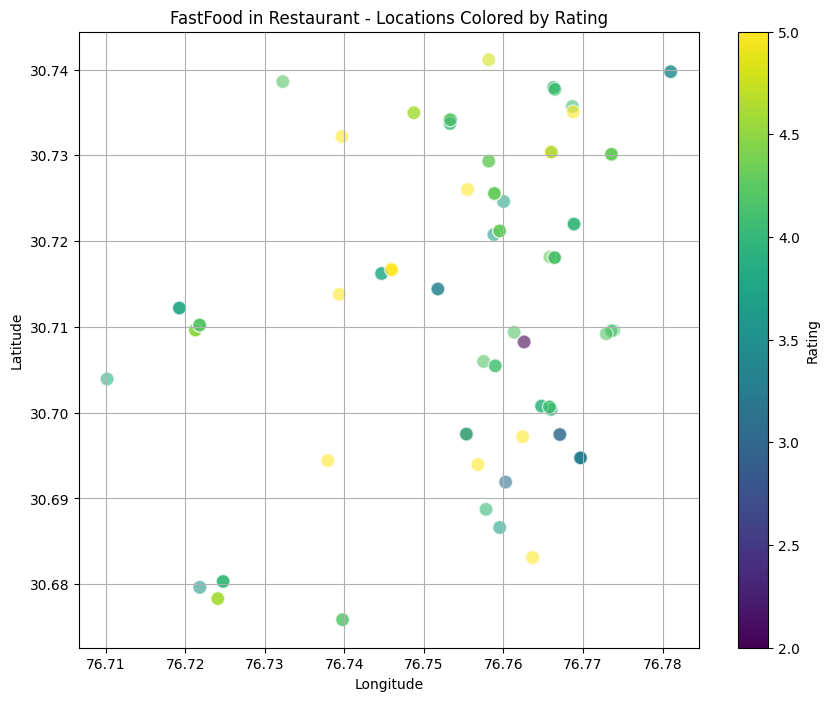

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable

# Load the data from output.csv
df = pd.read_csv('output.csv')

# Define the specific category and subcategory to analyze
category = 'Restaurant'
sub_category = 'FastFood'

# Filter the data for the specific category and subcategory
filtered_df = df[(df['Category'] == category) & (df['Sub-Category'] == sub_category)]

# Extract latitude, longitude, and rating columns from filtered data
latitude = filtered_df['Latitude']
longitude = filtered_df['Longitude']
rating = filtered_df['Rating']  # Assuming 'Rating' column exists in your dataset

# Plotting
fig, ax = plt.subplots(figsize=(10, 8))

# Create a colormap that maps ratings to colors
norm = Normalize(vmin=rating.min(), vmax=rating.max())
cmap = plt.get_cmap('viridis')
sm = ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])

# Scatter plot with color mapping based on ratings
scatter = ax.scatter(longitude, latitude, c=rating, cmap=cmap, norm=norm, alpha=0.6, edgecolors='w', s=100)
plt.colorbar(sm, label='Rating', ax=ax)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title(f'{sub_category} in {category} - Locations Colored by Rating')
ax.grid(True)
plt.show()


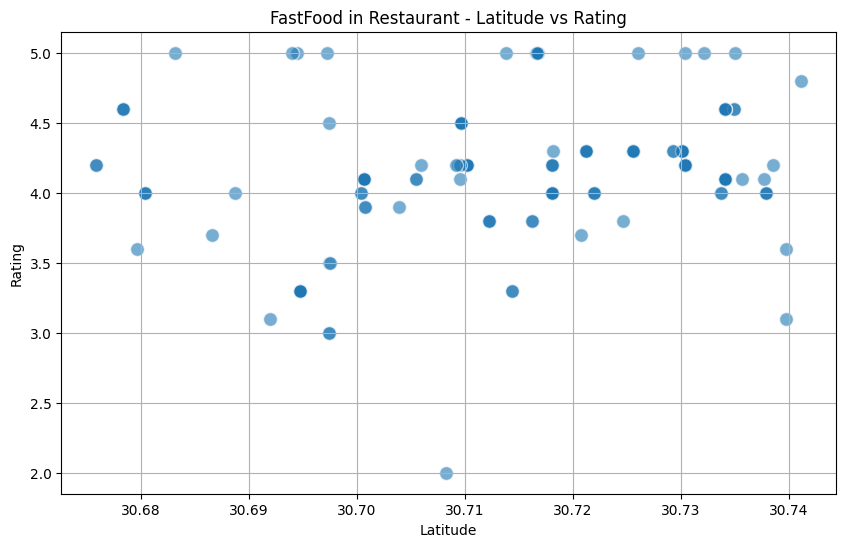

In [48]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from output.csv
df = pd.read_csv('output.csv')

# Define the specific category and subcategory to analyze
category = 'Restaurant'
sub_category = 'FastFood'

# Filter the data for the specific category and subcategory
filtered_df = df[(df['Category'] == category) & (df['Sub-Category'] == sub_category)]

# Extract latitude and rating columns from filtered data
latitude = filtered_df['Latitude']
rating = filtered_df['Rating']  # Assuming 'Rating' column exists in your dataset

# Plotting
plt.figure(figsize=(10, 6))

# Scatter plot of latitude vs rating
plt.scatter(latitude, rating, alpha=0.6, edgecolors='w', s=100)
plt.xlabel('Latitude')
plt.ylabel('Rating')
plt.title(f'{sub_category} in {category} - Latitude vs Rating')
plt.grid(True)
plt.show()


Training

In [51]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Load the dataset
df = pd.read_csv('test.csv')

# Filter for Petrol Pump sub-category
petrol_pump_df = df[df['Sub-Category'] == 'Petrol Pump']

# Check the size of the filtered dataset
print(f"Number of samples for Petrol Pump: {len(petrol_pump_df)}")

# Drop missing values
petrol_pump_df = petrol_pump_df.dropna()

# Check size after dropping missing values
print(f"Number of samples after dropping missing values: {len(petrol_pump_df)}")

# Select relevant features
features = ['Latitude', 'Longitude', 'Population', 'Rating', 'NumberofReviews']

# Check if there are enough samples to split
if len(petrol_pump_df) > 0:
    # Define X (features) and y (target)
    X = petrol_pump_df[features]
    y = petrol_pump_df['Rating_by_Audience']  # or 'Rating' depending on what you want to predict

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Initialize the RandomForestRegressor
    model = RandomForestRegressor(n_estimators=100, random_state=42)

    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    print(f'Mean Squared Error: {mse}')

    # Function to predict rating for a new location
    def predict_location_rating(latitude, longitude, population, rating, num_reviews):
        new_data = pd.DataFrame({
            'Latitude': [latitude],
            'Longitude': [longitude],
            'Population': [population],
            'Rating': [rating],
            'NumberofReviews': [num_reviews]
        })
        return model.predict(new_data)[0]

    # Example prediction for a new location
    new_latitude = 30.12345
    new_longitude = 76.54321
    new_population = 5000
    new_rating = 4.5
    new_reviews = 100
    predicted_rating = predict_location_rating(new_latitude, new_longitude, new_population, new_rating, new_reviews)
    print(f'Predicted Rating for new location: {predicted_rating}')

else:
    print("Insufficient data after filtering. Adjust your filtering criteria.")


Number of samples for Petrol Pump: 0
Number of samples after dropping missing values: 0
Insufficient data after filtering. Adjust your filtering criteria.


In [68]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor

# Load the dataset (assuming 'test.csv' contains relevant data)
df = pd.read_csv('test.csv')

# Filter for FuelStation category
fuel_station_df = df[df['Category'] == 'FuelStation']

# Drop missing values
fuel_station_df = fuel_station_df.dropna()

# Select relevant features
features = ['Latitude', 'Longitude', 'Population', 'Rating', 'NumberofReviews']

# Check if there are enough samples to train the model
if len(fuel_station_df) > 0:
    # Define X (features) and y (target)
    X = fuel_station_df[features]
    y = fuel_station_df['Rating_by_Audience']  # or 'Rating' depending on what you want to predict

    # Initialize the RandomForestRegressor
    model = RandomForestRegressor(n_estimators=100, random_state=42)

    # Train the model
    model.fit(X, y)

    # Function to predict rating for a new location
    def predict_location_rating(latitude, longitude, population, rating, num_reviews):
        new_data = pd.DataFrame({
            'Latitude': [latitude],
            'Longitude': [longitude],
            'Population': [population],
            'Rating': [rating],
            'NumberofReviews': [num_reviews]
        })
        return model.predict(new_data)[0]

    # Function to find the best location within a given boundary
    def find_best_location(latitude_min, latitude_max, longitude_min, longitude_max, step=0.1):
        # Adjust boundaries if they exceed valid latitude and longitude ranges
        if latitude_min < -90 or latitude_min > 90 or latitude_max < -90 or latitude_max > 90:
            print("Invalid latitude range. It should be between -90 and 90 degrees.")
            return None
        if longitude_min < -180 or longitude_min > 180 or longitude_max < -180 or longitude_max > 180:
            print("Invalid longitude range. It should be between -180 and 180 degrees.")
            return None

        # Adjust boundaries to not exceed maximum range
        latitude_min = max(latitude_min, -90)
        latitude_max = min(latitude_max, 90)
        longitude_min = max(longitude_min, -180)
        longitude_max = min(longitude_max, 180)

        # Generate potential locations within the boundary
        latitudes = np.arange(latitude_min, latitude_max, step)
        longitudes = np.arange(longitude_min, longitude_max, step)
        grid_points = np.array(np.meshgrid(latitudes, longitudes)).T.reshape(-1, 2)

        # Predict ratings for each potential location
        ratings = []
        for lat, lon in grid_points:
            rating = predict_location_rating(lat, lon, 10000, 4.5, 100)  # Example population, rating, and reviews
            ratings.append((lat, lon, rating))

        # Find the location with the highest predicted rating
        best_location = max(ratings, key=lambda x: x[2])
        return best_location

    # Example boundary
    latitude_min = 30.68805029690371
    latitude_max = 30.750863413283007
    longitude_min = 76.73726499899425
    longitude_max = 76.7648349520892

    # Find the best location within the specified boundary
    best_location = find_best_location(latitude_min, latitude_max, longitude_min, longitude_max)
    
    if best_location:
        best_latitude, best_longitude, best_rating = best_location
        print(f'Best location: Latitude {best_latitude}, Longitude {best_longitude}, Predicted Rating {best_rating}')
    else:
        print("Boundary conditions are invalid. Please check latitude and longitude ranges.")

else:
    print("Insufficient data after filtering. Adjust your filtering criteria.")


Best location: Latitude 30.68805029690371, Longitude 76.73726499899425, Predicted Rating 4.3872483011898025


In [65]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Load the dataset
df = pd.read_csv('test.csv')

# Filter for FuelStation category
fuel_station_df = df[df['Category'] == 'FuelStation']

# Check the size of the filtered dataset
print(f"Number of samples for FuelStation: {len(fuel_station_df)}")

# Drop missing values
fuel_station_df = fuel_station_df.dropna()

# Check size after dropping missing values
print(f"Number of samples after dropping missing values: {len(fuel_station_df)}")

# Select relevant features
features = ['Latitude', 'Longitude', 'Population', 'Rating', 'NumberofReviews']

# Check if there are enough samples to split
if len(fuel_station_df) > 0:
    # Define X (features) and y (target)
    X = fuel_station_df[features]
    y = fuel_station_df['Rating_by_Audience']  # or 'Rating' depending on what you want to predict

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Initialize the RandomForestRegressor
    model = RandomForestRegressor(n_estimators=100, random_state=42)

    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    print(f'Mean Squared Error: {mse}')

    # Function to predict rating for a new location
    def predict_location_rating(latitude, longitude, population, rating, num_reviews):
        new_data = pd.DataFrame({
            'Latitude': [latitude],
            'Longitude': [longitude],
            'Population': [population],
            'Rating': [rating],
            'NumberofReviews': [num_reviews]
        })
        return model.predict(new_data)[0]

    # Example prediction for a new location
    new_latitude = 51.5074
    new_longitude = -0.1278
    new_population = 10000
    new_rating = 4.5
    new_reviews = 100
    predicted_rating = predict_location_rating(new_latitude, new_longitude, new_population, new_rating, new_reviews)
    print(f'Predicted Rating for new location: {predicted_rating}')

else:
    print("Insufficient data after filtering. Adjust your filtering criteria.")


Number of samples for FuelStation: 228
Number of samples after dropping missing values: 228
Mean Squared Error: 0.013755853729769287
Predicted Rating for new location: 4.312614648102018


CORELATIONS

In [69]:
categories = {
    "Shop": [
        "Stationery", "Diary", "Beauty Parlour", "Clothing", "Electronics",
        "Grocery", "Jewellery", "Furniture", "Sporting Goods", "Toys",
        "Pharmacy", "Convenience Store", "Hardware Store", "Shoe Store"
    ],
    "Shopping Mall": [
        "Departmental Store", "Jewelry Store", "Food Court", "Cinema"
    ],
    "Fuel Station": [
        "Electrical Charging Station", "Petrol Pump", "LPG Station"
    ],
    "Office": [
        "Corporate Office", "Co-working Space", "Law Firm", "Accounting Firm",
        "Advertising Agency", "Non-Profit Organization", "Insurance Agency",
        "Travel Agency", "Media Company"
    ],
    "Pilgrimage Place": [
        "Temple", "Church", "Mosque", "Gurudwara", "Monastery", "Shrine"
    ],
    "Restaurant": [
        "Fast Food", "Fine Dining", "Cafe", "Bakery", "Bar", "Pub",
        "Food Truck", "Buffet", "Pizzeria", "Ice Cream Parlor"
    ],
    "Entertainment": [
        "Movie Theater", "Amusement Park", "Museum", "Sports Complex",
        "Concert Hall", "Zoo", "Comedy Club"
    ],
    "Hotel": [
        "Budget", "Mid-Range", "Luxury", "Hostel", "Resort", "Bed & Breakfast"
    ],
    "Hospital": [
        "General Hospital", "Specialty Hospital", "Children's Hospital",
        "Maternity Hospital", "Rehabilitation Center", "Mental Health Clinic",
        "Dental Clinic", "Eye Clinic", "Veterinary Clinic"
    ],
    "Educational Institute": [
        "School", "College", "University", "Art School", "Music School",
        "Tuition Center", "Dance School", "Driving School"
    ],
    "Financial Institution": [
        "Bank", "ATM", "Investment Firm"
    ],
    "Government Building": [
        "Post Office", "Police Station", "Fire Station", "Courthouse",
        "City Hall", "Library"
    ],
    "Outdoor Space": [
        "Park", "Lake", "Forest", "Garden", "River", "Waterfall"
    ],
    "Transportation": [
        "Airport", "Train Station", "Bus Stop", "Taxi Stand"
    ],
    "Personal Care": [
        "Laundry", "Hair Salon"
    ],
    "Fitness & Wellness": [
        "Gym", "Yoga Studio"
    ],
    "Event Venue": [
        "Conference Center", "Convention Center", "Stadium", "Arena"
    ]
}

# Combine categories and subcategories into a list of tuples
combined_categories = [(cat, subcat) for cat in categories for subcat in categories[cat]]
combined_categories


[('Shop', 'Stationery'),
 ('Shop', 'Diary'),
 ('Shop', 'Beauty Parlour'),
 ('Shop', 'Clothing'),
 ('Shop', 'Electronics'),
 ('Shop', 'Grocery'),
 ('Shop', 'Jewellery'),
 ('Shop', 'Furniture'),
 ('Shop', 'Sporting Goods'),
 ('Shop', 'Toys'),
 ('Shop', 'Pharmacy'),
 ('Shop', 'Convenience Store'),
 ('Shop', 'Hardware Store'),
 ('Shop', 'Shoe Store'),
 ('Shopping Mall', 'Departmental Store'),
 ('Shopping Mall', 'Jewelry Store'),
 ('Shopping Mall', 'Food Court'),
 ('Shopping Mall', 'Cinema'),
 ('Fuel Station', 'Electrical Charging Station'),
 ('Fuel Station', 'Petrol Pump'),
 ('Fuel Station', 'LPG Station'),
 ('Office', 'Corporate Office'),
 ('Office', 'Co-working Space'),
 ('Office', 'Law Firm'),
 ('Office', 'Accounting Firm'),
 ('Office', 'Advertising Agency'),
 ('Office', 'Non-Profit Organization'),
 ('Office', 'Insurance Agency'),
 ('Office', 'Travel Agency'),
 ('Office', 'Media Company'),
 ('Pilgrimage Place', 'Temple'),
 ('Pilgrimage Place', 'Church'),
 ('Pilgrimage Place', 'Mosque'),

In [3]:
import pandas as pd

# Load the dataset from a CSV file
df = pd.read_csv('output.csv')

# Filter rows where Row and Column values are within 0 to 10
filtered_df = df[(df['Row'] >= 0) & (df['Row'] <= 10) & (df['Column'] >= 0) & (df['Column'] <= 10)]

# Save the filtered data to a new CSV file
filtered_df.to_csv('filtered_data.csv', index=False)

print("Filtered data saved to 'filtered_data.csv'")


Filtered data saved to 'filtered_data.csv'


In [5]:
import pandas as pd

# Load the dataset from a CSV file
df = pd.read_csv('output.csv')

# Filter rows where Row is 0 and Column is 10
filtered_df = df[(df['Row'] == ) & (df['Column'] == 10)]

# Save the filtered data to a new CSV file
filtered_df.to_csv('filtered_data.csv', index=False)

print("Filtered data saved to 'filtered_data.csv'")


Filtered data saved to 'filtered_data.csv'


In [1]:
import csv
from collections import defaultdict

def remove_duplicates(input_file, output_file):
    seen_rows = defaultdict(list)
    unique_rows = []

    with open(input_file, 'r', newline='') as infile:
        reader = csv.reader(infile)
        headers = next(reader)  # Skip headers if they exist
        for row in reader:
            row_tuple = tuple(row)
            if row_tuple not in seen_rows:
                seen_rows[row_tuple] = True
                unique_rows.append(row)

    with open(output_file, 'w', newline='') as outfile:
        writer = csv.writer(outfile)
        writer.writerow(headers)  # Write headers
        writer.writerows(unique_rows)

# Usage example:
input_file = 'output.csv'
output_file = "input.csv"
remove_duplicates(input_file, output_file)
print(f"Duplicate rows removed. Unique data saved to {output_file}.")

Duplicate rows removed. Unique data saved to input.csv.


In [2]:
import os
import pandas as pd

# Load the dataset from a CSV file
df = pd.read_csv('input.csv')

# Define the range for column 'n'
n = 24

# Create a folder to store CSV files
folder_name = 'filtered_data_files'
os.makedirs(folder_name, exist_ok=True)

# Iterate over each row and filter data
for row in range(0, n+1):
    for column in range(0, n+1):
        filtered_df = df[(df['Row'] == row) & (df['Column'] == column)]
        if not filtered_df.empty:
            # Create a filename based on Row and Column
            filename = f'Data_{row}_{column}.csv'
            filepath = os.path.join(folder_name, filename)
            
            # Save filtered data to CSV file
            filtered_df.to_csv(filepath, index=False)
            print(f"Saved {filename}")

print("Filtered data saved to CSV files in folder 'filtered_data_files'")


Saved Data_0_0.csv
Saved Data_0_1.csv
Saved Data_0_2.csv
Saved Data_0_3.csv
Saved Data_0_4.csv
Saved Data_0_5.csv
Saved Data_0_6.csv
Saved Data_0_7.csv
Saved Data_0_8.csv
Saved Data_0_9.csv
Saved Data_0_10.csv
Saved Data_0_11.csv
Saved Data_0_12.csv
Saved Data_0_13.csv
Saved Data_0_14.csv
Saved Data_0_15.csv
Saved Data_0_16.csv
Saved Data_0_17.csv
Saved Data_0_18.csv
Saved Data_0_19.csv
Saved Data_0_20.csv
Saved Data_0_21.csv
Saved Data_0_22.csv
Saved Data_0_23.csv
Saved Data_0_24.csv
Saved Data_1_0.csv
Saved Data_1_1.csv
Saved Data_1_4.csv
Saved Data_1_5.csv
Saved Data_1_6.csv
Saved Data_1_7.csv
Saved Data_1_8.csv
Saved Data_1_9.csv
Saved Data_1_10.csv
Saved Data_1_11.csv
Saved Data_1_12.csv
Saved Data_1_13.csv
Saved Data_1_15.csv
Saved Data_1_16.csv
Saved Data_1_17.csv
Saved Data_1_18.csv
Saved Data_1_19.csv
Saved Data_1_20.csv
Saved Data_1_21.csv
Saved Data_1_22.csv
Saved Data_1_23.csv
Saved Data_2_0.csv
Saved Data_2_1.csv
Saved Data_2_2.csv
Saved Data_2_3.csv
Saved Data_2_4.csv
Sav